In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, _), (test_images, _) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
noise_factor = 0.2
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.summary()

model.compile(optimizer='adadelta', loss='binary_crossentropy')




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 32)       0

In [6]:
model.fit(train_images_noisy, train_images,
                epochs=100,
                batch_size=128,
                shuffle=True,
                verbose = 2)

decoded_imgs = model.predict(test_images_noisy)

Epoch 1/100
469/469 - 3s - loss: 0.5259 - 3s/epoch - 6ms/step
Epoch 2/100
469/469 - 3s - loss: 0.5007 - 3s/epoch - 6ms/step
Epoch 3/100
469/469 - 3s - loss: 0.4799 - 3s/epoch - 6ms/step
Epoch 4/100
469/469 - 3s - loss: 0.4552 - 3s/epoch - 6ms/step
Epoch 5/100
469/469 - 3s - loss: 0.4235 - 3s/epoch - 6ms/step
Epoch 6/100
469/469 - 3s - loss: 0.3825 - 3s/epoch - 6ms/step
Epoch 7/100
469/469 - 3s - loss: 0.3355 - 3s/epoch - 6ms/step
Epoch 8/100
469/469 - 3s - loss: 0.2925 - 3s/epoch - 6ms/step
Epoch 9/100
469/469 - 3s - loss: 0.2610 - 3s/epoch - 6ms/step
Epoch 10/100
469/469 - 3s - loss: 0.2401 - 3s/epoch - 6ms/step
Epoch 11/100
469/469 - 3s - loss: 0.2258 - 3s/epoch - 6ms/step
Epoch 12/100
469/469 - 3s - loss: 0.2152 - 3s/epoch - 6ms/step
Epoch 13/100
469/469 - 3s - loss: 0.2069 - 3s/epoch - 6ms/step
Epoch 14/100
469/469 - 3s - loss: 0.1999 - 3s/epoch - 6ms/step
Epoch 15/100
469/469 - 3s - loss: 0.1939 - 3s/epoch - 6ms/step
Epoch 16/100
469/469 - 3s - loss: 0.1885 - 3s/epoch - 6ms/step
E

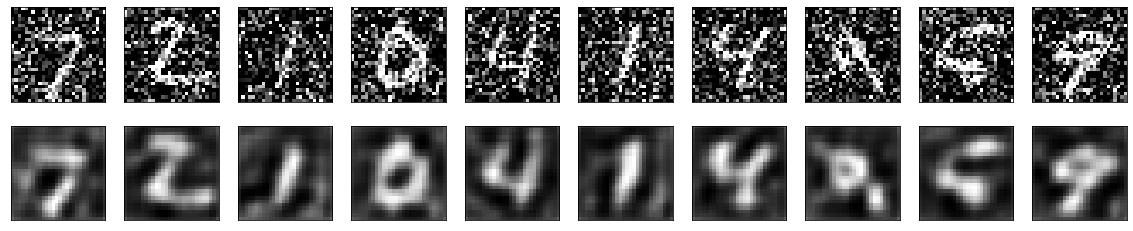

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
